In [17]:
# 读入数据
import pandas as pd
DATA = pd.read_csv('rushdata.csv', index_col=0)

In [18]:
data = DATA

In [19]:
count =0
for i in range(len(data)):
    if data['rn'][i] != data['rvip'][i] or data['rn'][i] != data['rvag'][i] or data['rvag'][i] != data['rvip'][i]:
        count +=1
# 查看到82185组不同

In [23]:
data.head()

,pin,rn,rvip,rvag,rq1,rq2
0,jd_59ace42f929f0,2,1,1,26,0
1,jupiternil,1,1,1,763,1
2,18831196178_p,2,2,2,200,0
3,jd_642c8a30ff83e,23,1,1,128,1
4,jd_0927921569696,2,1,1,448,0


In [21]:

# ->备用方案为:
'''
    按照相同用户名，做第一次分类，
        统计该用户的，
            1.访问次数（或者依据其访问时间再分析其访问密度）
            2.访问方法
            3.访问控制请求种类
'''
# ->备用方案二：
'''
    OrdinaryEncoder进行编码
'''
# 数据预处理方案1

'\n    OrdinaryEncoder进行编码\n'

In [27]:
from urllib.parse import urlparse, parse_qs
s = data['requestline'][4]
parse_qs(urlparse(s).query).get('functionId')

['submitOrder']

In [15]:
pdict = {}
for i in range(len(data)):
    if pdict.get(data['pin'][i]):
        pdict[data['pin'][i]] += 1
    else :
        pdict[data['pin'][i]] = 1
        

In [30]:
tdict = {}
for i in range(len(data)):
    if tdict.get(data['time'][i]):
        tdict[data['time'][i]] += 1
    else :
        tdict[data['time'][i]] = 1

In [18]:
from urllib.parse import urlparse, parse_qs
def fil(s):
    if not parse_qs(urlparse(s).query):
        return urlparse(s).path
    else :
        if parse_qs(urlparse(s).query).get('functionId'):
            return parse_qs(urlparse(s).query).get('functionId')[0]
        else :
            return urlparse(s).path
rldict = {}
for i in range(len(data)):
    if rldict.get(fil(data['requestline'][i])):
        rldict[fil(data['requestline'][i])] += 1
    else :
        rldict[fil(data['requestline'][i])] = 1

NameError: name 'data' is not defined

'jd_59ace42f929f0'

In [27]:
# 打乱数据集，通过打乱索引的方式
import random
rlist = [i for i in range(len(data))]
random.shuffle(rlist)

In [24]:
data.head()

,pin,rn,rvip,rvag,rq1,rq2
0,jd_59ace42f929f0,2,1,1,26,0
1,jupiternil,1,1,1,763,1
2,18831196178_p,2,2,2,200,0
3,jd_642c8a30ff83e,23,1,1,128,1
4,jd_0927921569696,2,1,1,448,0


In [25]:
# 构造输入
import numpy as np
alldata = np.zeros((len(data),5))
for i in range(len(data)):
    alldata[i] = np.array([data['rn'][i],data['rvip'][i],data['rvag'][i],data['rq1'][i],data['rq2'][i]])

In [26]:
# 分割数据集
traindata = alldata[0:120000]
testdata = alldata[120000:150000]

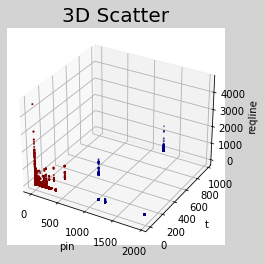

In [178]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=2, n_init=1, init='k-means++',tol=0.0001)
kmeans.fit(traindata)
y_pred = kmeans.predict(testdata)
plot3D(testdata, y_pred)

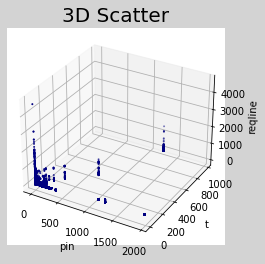

In [38]:
# 定义并作图
import matplotlib.pyplot as plt
def plot3D(testdata, y_pred):
    x = []
    y = []
    z = []
    for i in range(len(testdata)):
        x.append(testdata[i][0])
        y.append(testdata[i][1])
        z.append(testdata[i][3])

    plt.figure("3D Scatter", facecolor="lightgray")
    ax3d = plt.subplot(projection="3d")  # 创建三维坐标

    plt.title('3D Scatter', fontsize=20)
    ax3d.set_xlabel('pin', fontsize=10)
    ax3d.set_ylabel('t', fontsize=10)
    ax3d.set_zlabel('reqline', fontsize=10)
    plt.tick_params(labelsize=10)

    ax3d.scatter(x, y, z, s=1, c=y_pred, cmap="jet", marker="o")

    plt.show()
# 对原始点作图
orin_l = [1 for i in range(len(testdata))]
plot3D(testdata, orin_l)

In [158]:
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        y_pred[i] = 0
    else :
        y_pred[i] = 1

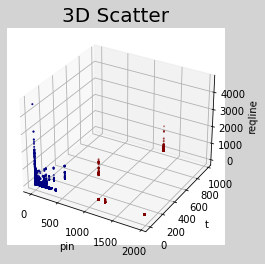

In [159]:
plot3D(testdata, y_pred)

In [119]:
# 孤立森林
from sklearn.ensemble import IsolationForest
# 创建模型，n_estimators：int，可选（默认值= 100），集合中的基本估计量的数量
model_isof = IsolationForest(n_estimators=100,max_features=2,contamination='auto')
# 计算有无异常的标签分布
model_isof.fit(traindata)
outlier_label = model_isof.predict(testdata)

In [121]:
for i in range(len(outlier_label)):
    if outlier_label[i] == 1:
        outlier_label[i] = 0
    else :
        outlier_label[i] = 1

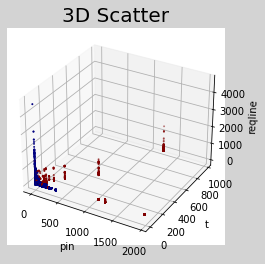

In [122]:
# 作图
plot3D(testdata, outlier_label)

In [107]:
# HBOS
from pyod.models.hbos import HBOS
model_hbos = HBOS(n_bins=10,alpha=0.1,tol=0.5,contamination=0.2)
model_hbos.fit(traindata)
hbos_pred = model_hbos.predict(testdata)

In [105]:
for i in range(len(hbos_pred)):
    if hbos_pred[i]:
        hbos_pred[i] = 0
    else :
        hbos_pred[i] = 1

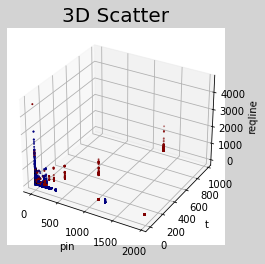

In [108]:
plot3D(testdata, hbos_pred)

In [6]:
import random


In [10]:
t = [1,4]
random.shuffle(t)
t[0]

1

In [12]:
from pyspark.sql.types import * 
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from graphframes import *
 
spark = SparkSession.builder \
                    .master("local") \
                    .appName("graphframe test") \
                    .getOrCreate()
 
def create_transport_graph(): 
    node_fields = [
        StructField("id", StringType(), True),
        StructField("latitude", FloatType(), True),
        StructField("longitude", FloatType(), True),
        StructField("population", IntegerType(), True)
    ]
    nodes = spark.read.csv("data/transport-nodes.csv", header=True,
                           schema=StructType(node_fields))
    rels = spark.read.csv("data/transport-relationships.csv", header=True)
    reversed_rels = (rels.withColumn("newSrc", rels.dst)
                     .withColumn("newDst", rels.src)
                     .drop("dst", "src")
                     .withColumnRenamed("newSrc", "src")
                     .withColumnRenamed("newDst", "dst")
                     .select("src", "dst", "relationship", "cost"))
    relationships = rels.union(reversed_rels) 
    return GraphFrame(nodes, relationships)
 
# 生成图
g = create_transport_graph()

# 顶点筛选
g.vertices.filter("population > 100000 and population < 300000").sort("population").show()